In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Advertising.csv')
df = df.drop(['Unnamed: 0', 'TV', 'Radio'], axis=1)
df.head()

,Newspaper,Sales
0,69.2,22.1
1,45.1,10.4
2,69.3,9.3
3,58.5,18.5
4,58.4,12.9


In [3]:
df.shape

(200, 2)

In [4]:
def Bootstrap(df):
    #generate a random index with dataset limits, 
    #add corresponding row to the new dataframe and return new df
    selectedIndex = np.random.randint(200, size = 200)
    new_df = df.iloc[selectedIndex]
    return new_df

In [5]:
beta0_list, beta1_list = [], []

number_of_bootstraps = 1000
for i in range(number_of_bootstraps):
    df_new = Bootstrap(df)
    x = df_new['Newspaper']
    y = df_new['Sales']
    
    xmean = x.mean()
    ymean = y.mean()
    
    beta1 = (np.sum((x - xmean) * (y - ymean)))/(np.sum((x - xmean) ** 2))
    beta0 = ymean - (beta1 * xmean)
    
    beta0_list.append(beta0)
    beta1_list.append(beta1)

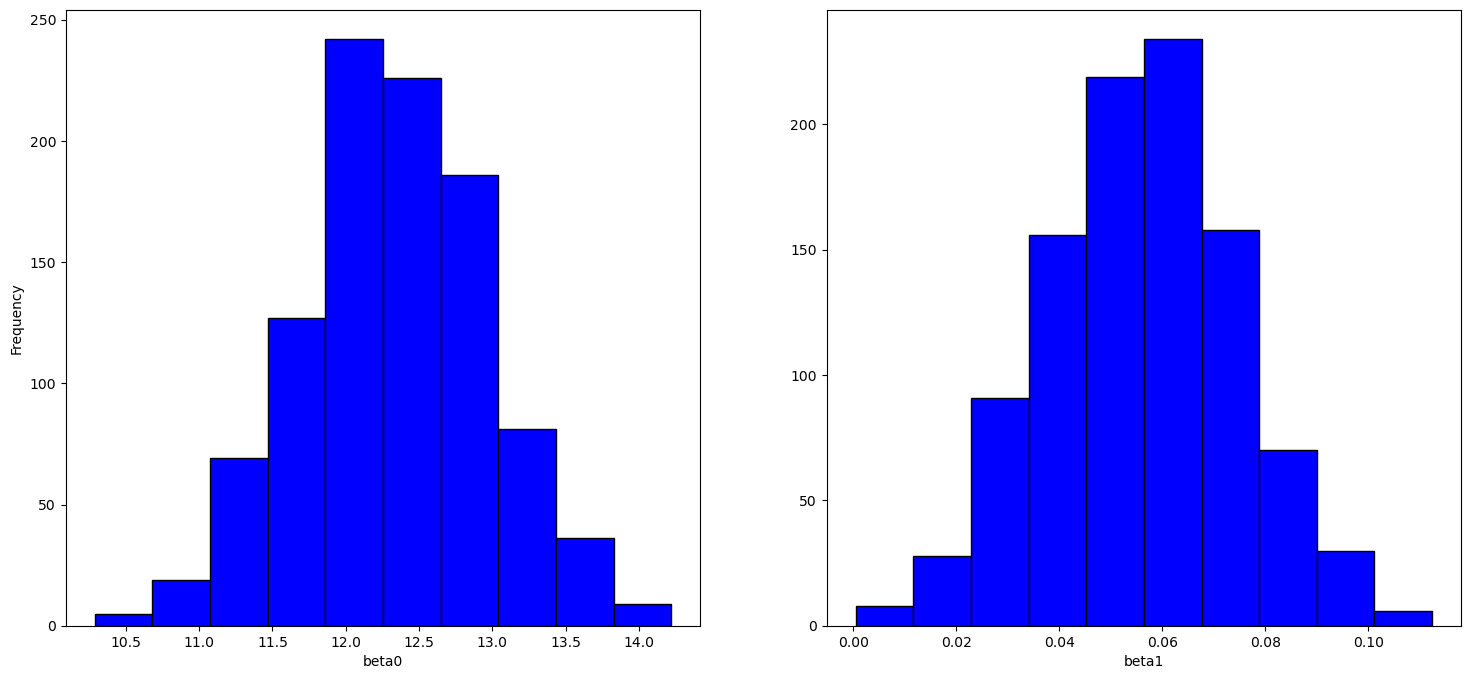

In [6]:
# plot histogram of beta0 and beta1
fig, ax = plt.subplots(1,2, figsize=(18,8))
ax[0].hist(beta0_list, color='blue', edgecolor='black')
ax[1].hist(beta1_list, color='blue', edgecolor='black')
ax[0].set_xlabel('beta0')
ax[1].set_xlabel('beta1')
ax[0].set_ylabel('Frequency');

## Confidence Interval for Beta value

In [7]:
beta0_list.sort()
beta1_list.sort()

In [9]:
beta0_CI = (np.percentile(beta0_list, 2.5), np.percentile(beta0_list, 97.5))
beta1_CI = (np.percentile(beta1_list, 2.5), np.percentile(beta1_list, 97.5))

In [11]:
print(f'The beta0 confidence interval is {beta0_CI[0]:.3f}, {beta0_CI[1]:.3f}')
print(f'The beta1 confidence interval is {beta1_CI[0]:.3f}, {beta1_CI[1]:.3f}')

The beta0 confidence interval is 11.108, 13.609
The beta1 confidence interval is 0.020, 0.092


In [12]:
def plot_simulation(simulation,confidence):
    plt.hist(simulation, bins = 30, label = 'beta distribution', align = 'left', density = True)
    plt.axvline(confidence[1], 0, 1, color = 'red', label = 'Right Interval')
    plt.axvline(confidence[0], 0, 1, color = 'red', label = 'Left Interval')
    plt.xlabel('Beta value')
    plt.ylabel('Frequency')
    plt.title('Confidence Interval')
    plt.legend(frameon = False, loc = 'upper right')

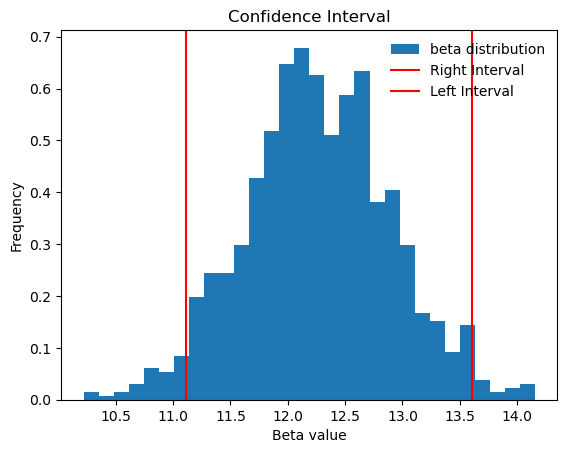

In [14]:
plot_simulation(beta0_list,beta0_CI)

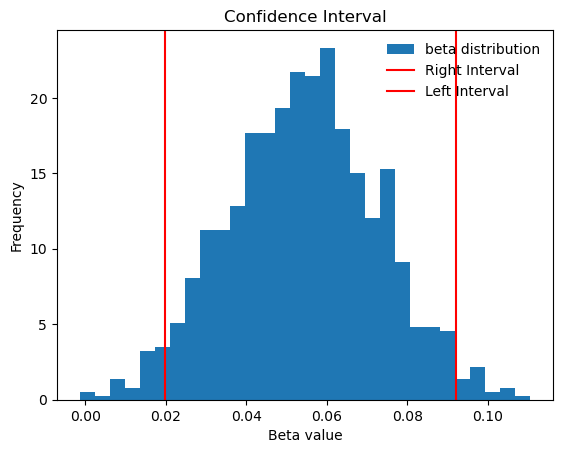

In [15]:
plot_simulation(beta1_list,beta1_CI)